In [ ]:
import pandas as pd
import numpy as np

In [16]:
import pandas as pd

df = pd.read_csv("Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
df5 = df.isnull()
print(df5)

          N      P      K  temperature  humidity     ph  rainfall  label
0     False  False  False        False     False  False     False  False
1     False  False  False        False     False  False     False  False
2     False  False  False        False     False  False     False  False
3     False  False  False        False     False  False     False  False
4     False  False  False        False     False  False     False  False
...     ...    ...    ...          ...       ...    ...       ...    ...
2195  False  False  False        False     False  False     False  False
2196  False  False  False        False     False  False     False  False
2197  False  False  False        False     False  False     False  False
2198  False  False  False        False     False  False     False  False
2199  False  False  False        False     False  False     False  False

[2200 rows x 8 columns]


In [ ]:
# Encode target labels (crop names) into numbers
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


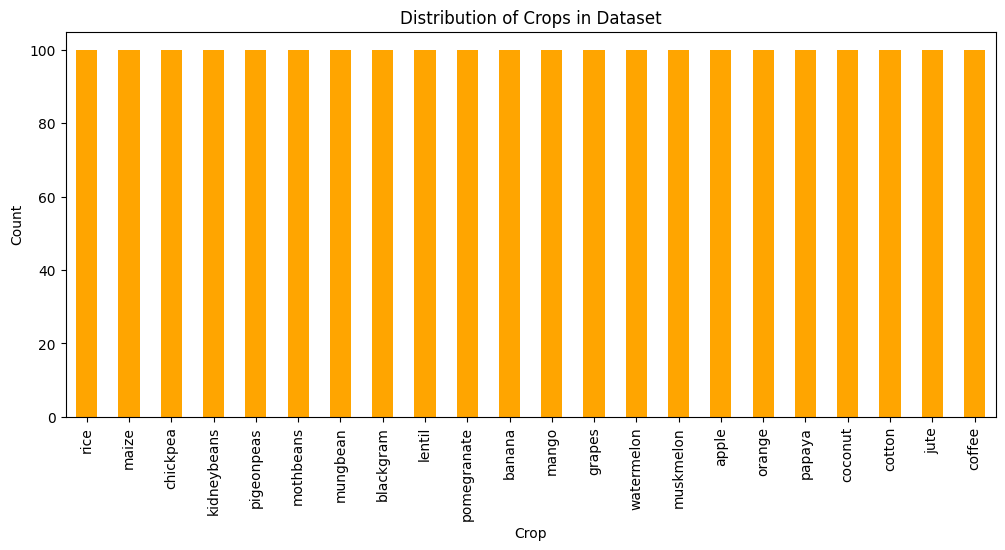

In [ ]:
plt.figure(figsize=(12,5))
df['label'].value_counts().plot(kind='bar', color="orange")
plt.title("Distribution of Crops in Dataset")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.show()

In [ ]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  Initialize ML models:
naive_bayes_model = GaussianNB()
logistic_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()
models = {
    "Naive Bayes": naive_bayes_model,
    "Logistic Regression": logistic_model,
    "Support Vector Machine (SVM)": svm_model,
    "Random Forest": random_forest_model,
    "K-Nearest Neighbors (KNN)": knn_model,
    "Decision Tree": decision_tree_model
}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


 Training Naive Bayes
Naive Bayes Accuracy: 1.00


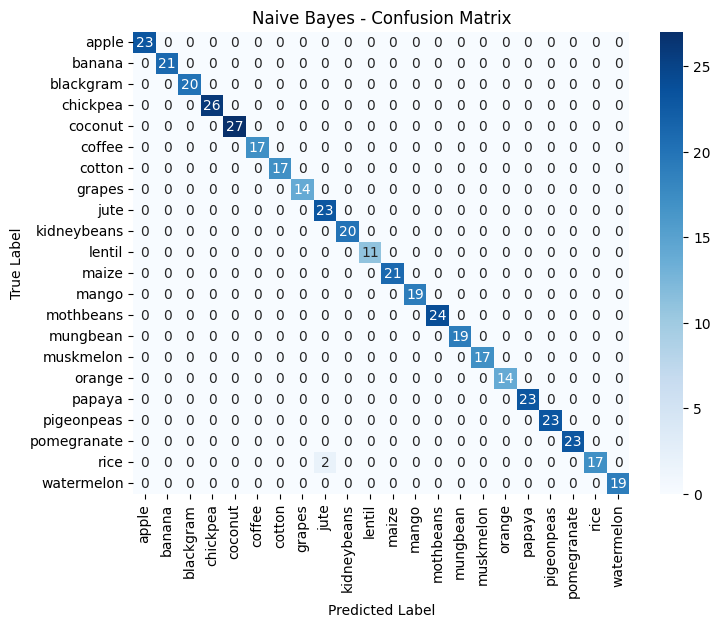

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
# Naive Bayes
print("\n Training Naive Bayes")
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_pred = naive_bayes_model.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_pred):.2f}")
plot_confusion_matrix(y_test, nb_pred, "Naive Bayes")
print(classification_report(y_test, nb_pred, target_names=encoder.classes_.astype(str)))


 Training Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.94


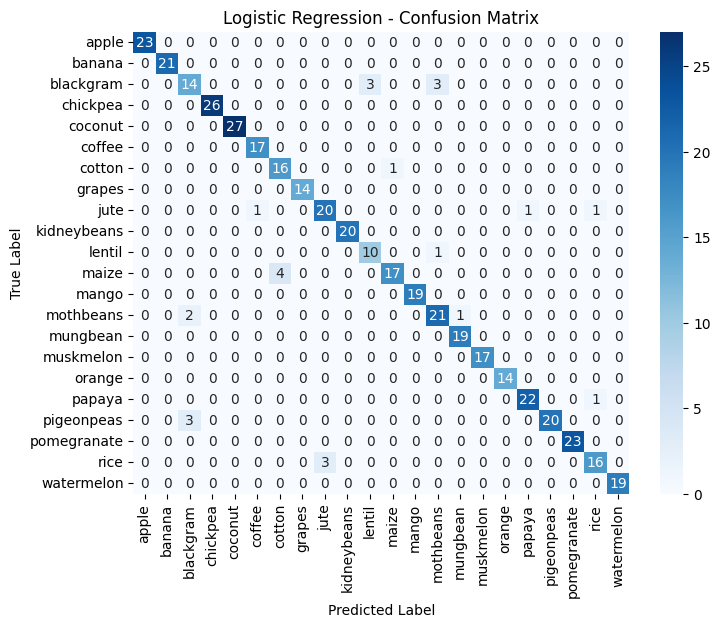

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.74      0.70      0.72        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.77      0.91      0.83        11
       maize       0.94      0.81      0.87        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.84      0.88      0.86        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

In [ ]:
# Logistic Regression
print("\n Training Logistic Regression")
logistic_model = LogisticRegression(max_iter=300)
logistic_model.fit(X_train, y_train)
log_pred = logistic_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.2f}")
plot_confusion_matrix(y_test, log_pred, "Logistic Regression")
print(classification_report(y_test, log_pred, target_names=encoder.classes_.astype(str)))


 Training Support Vector Machine
SVM Accuracy: 0.96


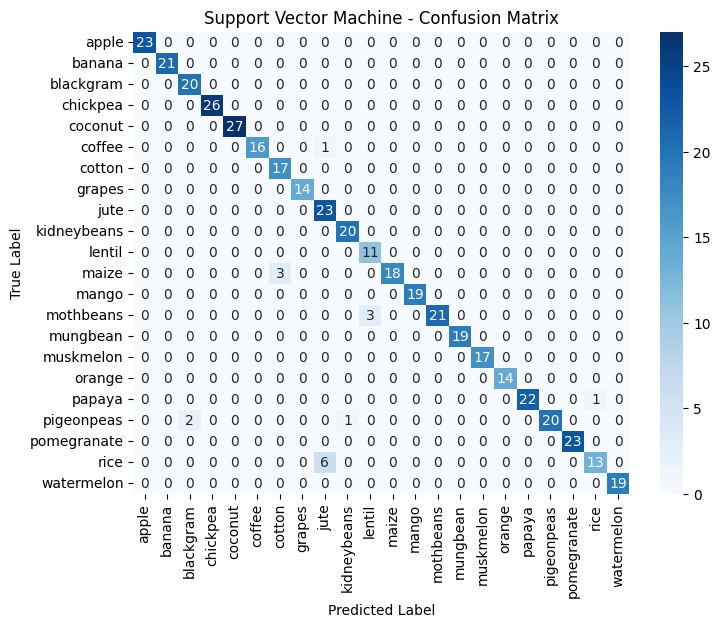

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       0.77      1.00      0.87        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
# Support Vector Machine (SVM)
print("\n Training Support Vector Machine")
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
plot_confusion_matrix(y_test, svm_pred, "Support Vector Machine")
print(classification_report(y_test, svm_pred, target_names=encoder.classes_.astype(str)))


 Training Random Forest
Random Forest Accuracy: 0.99


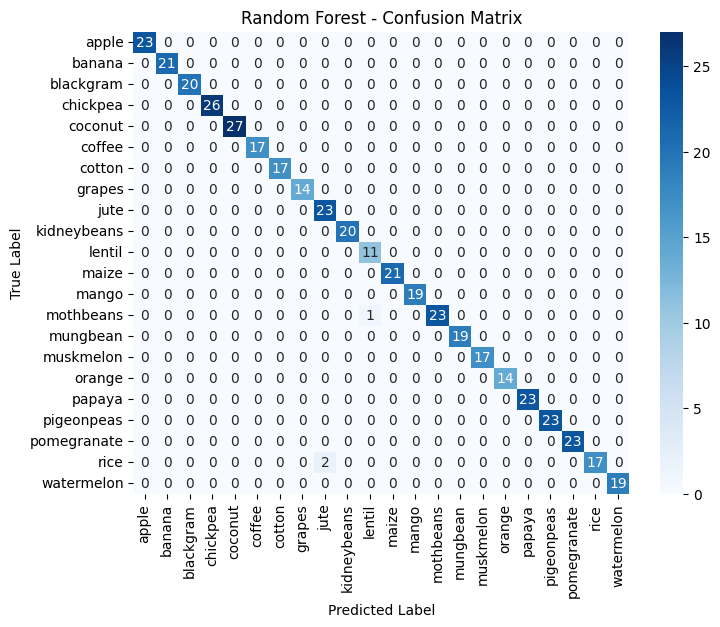

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [17]:
# Random Forest
print("\n Training Random Forest")
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)
rf_pred = random_forest_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
plot_confusion_matrix(y_test, rf_pred, "Random Forest")
print(classification_report(y_test, rf_pred, target_names=encoder.classes_))

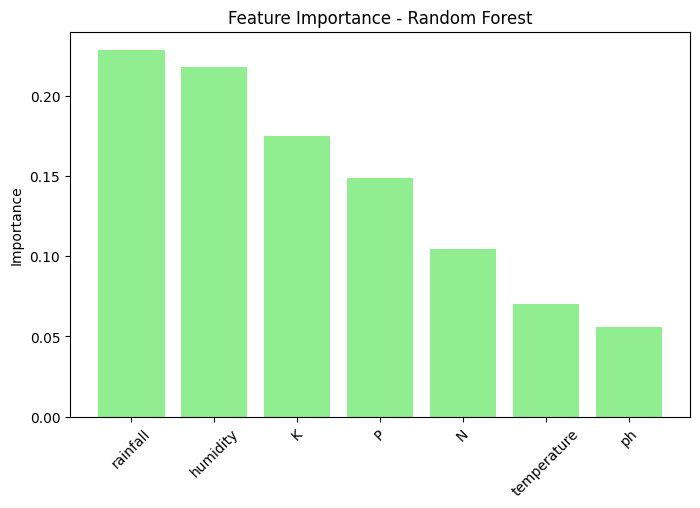

In [18]:
import numpy as np

random_forest_model.fit(X_train, y_train)

# Feature importance from Random Forest
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices], color="lightgreen")
plt.xticks(range(len(importances)), X.columns[indices], rotation=45)
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()


 Training K-Nearest Neighbors
KNN Accuracy: 0.97


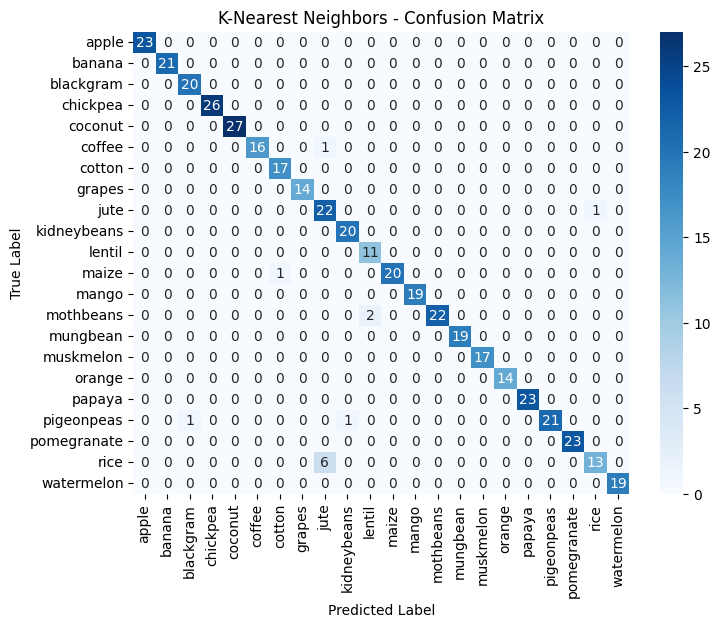

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [19]:
# K-Nearest Neighbors (KNN)
print("\n Training K-Nearest Neighbors")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
plot_confusion_matrix(y_test, knn_pred, "K-Nearest Neighbors")
print(classification_report(y_test, knn_pred, target_names=encoder.classes_.astype(str)))


 Training Decision Tree
Decision Tree Accuracy: 0.99


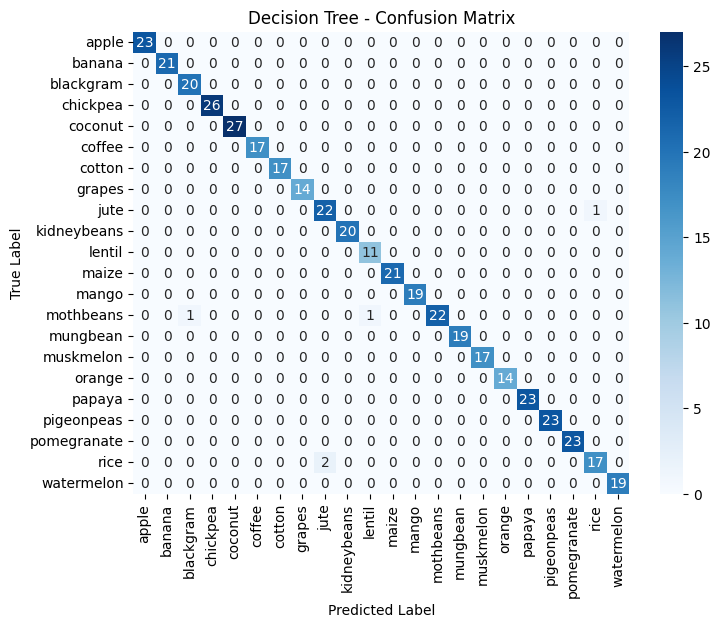

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [20]:
# Decision Tree
print("\n Training Decision Tree")
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
dt_pred = decision_tree_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.2f}")
plot_confusion_matrix(y_test, dt_pred, "Decision Tree")
print(classification_report(y_test, dt_pred, target_names=encoder.classes_.astype(str)))

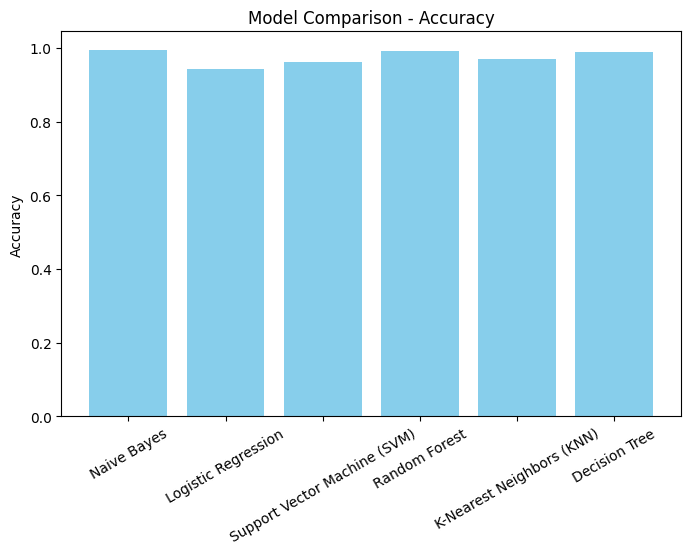

In [21]:
from sklearn.metrics import accuracy_score
accuracies = {
    "Naive Bayes": accuracy_score(y_test, nb_pred),
    "Logistic Regression": accuracy_score(y_test, log_pred),
    "Support Vector Machine (SVM)": accuracy_score(y_test, svm_pred),
    "Random Forest": accuracy_score(y_test, random_forest_model.predict(X_test)),
    "K-Nearest Neighbors (KNN)": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred)
}

# Plot accuracy comparison
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color="skyblue")
plt.xticks(rotation=30)
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.show()

In [22]:
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall, model_choice):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Select the model
    model_dict = {
        "Naive Bayes": naive_bayes_model,
        "Logistic Regression": logistic_model,
        "Support Vector Machine (SVM)": svm_model,
        "Random Forest": random_forest_model,
        "K-Nearest Neighbors (KNN)": knn_model,
        "Decision Tree": decision_tree_model
    }

    model = model_dict.get(model_choice)
    if model is None:
        return "⚠️ Invalid model selected"

    # Predict numeric label
    prediction = model.predict(input_data)

    # Convert numeric label back to crop name
    predicted_crop = encoder.inverse_transform(prediction)[0]

    return f"🌾 Recommended Crop: {predicted_crop}"


In [23]:
gr.Interface(
    fn=recommend_crop,
    inputs=[
        gr.Number(label="Nitrogen (N)"),
        gr.Number(label="Phosphorous (P)"),
        gr.Number(label="Potassium (K)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall (mm)"),
        gr.Dropdown(
            ["Naive Bayes", "Logistic Regression", "Support Vector Machine (SVM)",
             "Random Forest", "K-Nearest Neighbors (KNN)", "Decision Tree"],
            label="Choose Model"
        )
    ],
    outputs=gr.Text(label="Prediction"),
    title="🌿 Smart Crop Recommendation System",
    description="""
    ## Welcome to the Smart Crop Recommendation System!

    Enter the soil and weather parameters below and select a machine learning model to get a recommendation for the most suitable crop.

    **Input Parameters:**
    - Nitrogen (N), Phosphorous (P), Potassium (K) in soil
    - Temperature, Humidity, and pH of the environment
    - Rainfall amount

    Choose your preferred model from the dropdown.
    """,
    theme="soft"
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aafca8ca5c1b6cda78.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
